In [1]:
# Importy
from util import *
from DataStructures import *
import tkinter as tk
from plotter import Plotter
from vis_bit.main import Visualizer

# Dodawanie do jednego trapezu

In [2]:
def insertIntoOne(sg : TrapezoidMap , trapezoid : Trapezoid, segment : Segment):
    left = Trapezoid(trapezoid.topSegment, trapezoid.bottomSegment, trapezoid.leftPoint, segment.leftPoint)
    top = Trapezoid(trapezoid.topSegment, segment, segment.leftPoint, segment.rightPoint)
    bottom = Trapezoid(segment, trapezoid.bottomSegment, segment.leftPoint, segment.rightPoint)
    right = Trapezoid(trapezoid.topSegment, trapezoid.bottomSegment, segment.rightPoint, trapezoid.rightPoint)
    
    left.topRight = top
    left.topLeft = trapezoid.topLeft
    left.bottomRight = bottom
    left.bottomLeft = trapezoid.bottomLeft
    
    top.topRight = right
    top.topLeft = left
    top.bottomRight = right
    top.bottomLeft = left
    
    bottom.topRight = right
    bottom.topLeft = left
    bottom.bottomLeft = left
    bottom.bottomRight = right
    
    right.topRight = trapezoid.topRight
    right.topLeft = top
    right.bottomRight = trapezoid.bottomRight
    right.bottomLeft = bottom
    
    updateLeft(trapezoid, left)
    updateRight(trapezoid, right)
    
    leftNode = Tnode(left)
    topNode = Tnode(top)
    bottomNode = Tnode(bottom)
    rightNode = Tnode(right)
    
    snode = Snode(segment, topNode, bottomNode)
    qnode = Pnode(segment.rightPoint, snode, rightNode)
    pnode = Pnode(segment.leftPoint, leftNode, qnode)
    trapezoid.node.replaceNode(sg, pnode)
    
    return [left, top, bottom, right]
    

In [3]:
def insertIntoMany(sg: TrapezoidMap, intersects: list[Trapezoid], segment: Segment):
    upperMid = None
    lowerMid = None
    merge = False
    
    added = []
    
    for trap in intersects:
        if trap == intersects[0]:
            left = Trapezoid(trap.topSegment, trap.bottomSegment, trap.leftPoint, segment.leftPoint)
            
            if segment.isAbove(trap.rightPoint):
                upperMid = Trapezoid(trap.topSegment, segment, segment.leftPoint, left.rightPoint)
                lowerMid = Trapezoid(segment, trap.bottomSegment, segment.leftPoint, None)
                merge = False
            else:
                upperMid = Trapezoid(trap.topSegment, segment, segment.leftPoint, None)
                lowerMid = Trapezoid(segment, trap.bottomSegment, segment.leftPoint, trap.rightPoint)
                merge = True
            
            left.topRight = upperMid
            left.topLeft = trap.topLeft
            left.bottomRight = lowerMid
            left.bottomLeft = trap.bottomLeft
            
            if merge:
                upperMid.topRight = trap.topRight
                upperMid.bottomRight = trap.topRight
                lowerMid.topRight = trap.topRight
                lowerMid.bottomRight = trap.bottomRight
            else:
                upperMid.topRight = trap.topRight
                upperMid.bottomRight = trap.bottomRight
                lowerMid.topRight = trap.bottomRight
                lowerMid.bottomRight = trap.bottomRight
            upperMid.topLeft = left
            upperMid.bottomLeft = left
            lowerMid.topLeft = left
            lowerMid.bottomLeft = left
            
            updateLeft(trap, left)
            
            if merge:
                updateRight(trap, lowerMid)
            else:
                updateRight(trap, upperMid)
                
            added.append(left)
            added.append(upperMid)
            added.append(lowerMid)
            
            leftNode = Tnode(left)
            upperMidNode = Tnode(upperMid)
            lowerMidNode = Tnode(lowerMid)  
            snode = Snode(segment, upperMidNode, lowerMidNode)
            pnode = Pnode(segment.leftPoint, leftNode, snode)
            trap.node.replaceNode(sg, pnode)
        
        elif trap == intersects[-1]:
            right = Trapezoid(trap.topSegment, trap.bottomSegment, segment.rightPoint, trap.rightPoint)
            if merge:
                upperMid.rightPoint = segment.rightPoint
                lowerMid = Trapezoid(segment, trap.bottomSegment, trap.leftPoint, segment.rightPoint)
                upperMidNode = upperMid.node
                lowerMidNode = Tnode(lowerMid)
                
            else:
                upperMid = Trapezoid(trap.topSegment, segment, trap.leftPoint, segment.rightPoint)
                lowerMid.rightPoint = segment.rightPoint
                upperMidNode = Tnode(upperMid)
                lowerMidNode = lowerMid.node
            
            right.topRight = trap.topRight
            right.topLeft = upperMid
            right.bottomRight = trap.bottomRight
            right.bottomLeft = lowerMid
            
            upperMid.topRight = right
            upperMid.bottomRight = right
            lowerMid.topRight = right
            lowerMid.bottomRight = right
            
            if merge:
                lowerMid.topLeft = trap.topLeft
                lowerMid.bottomLeft = trap.bottomLeft
            else:
                upperMid.topLeft = trap.topLeft
                upperMid.bottomLeft = trap.bottomLeft
            updateRight(trap, right)
            
            if merge:
                updateLeft(trap, lowerMid)
            else:
                updateLeft(trap, upperMid)
            
            added.append(upperMid)
            added.append(lowerMid)
            added.append(right)
            
            rightNode = Tnode(right)
            snode = Snode(segment, upperMidNode, lowerMidNode)
            qnode = Pnode(segment.rightPoint, snode, rightNode)
            trap.node.replaceNode(sg, qnode)
            
        else:
            flag = False
            if merge:
                oldLow = lowerMid
                lowerMid = Trapezoid(segment, trap.bottomSegment, trap.leftPoint, None)
                upperMidNode = upperMid.node
                lowerMidNode = Tnode(lowerMid)
            else:
                oldUpper = upperMid
                upperMid = Trapezoid(trap.topSegment, segment, trap.leftPoint, None)
                upperMidNode = Tnode(upperMid)
                lowerMidNode = lowerMid.node
            if segment.isAbove(trap.rightPoint):
                upperMid.rightPoint = trap.rightPoint
                if merge:
                    flag = True
                merge = False
                added.append(upperMid)
            else:
                lowerMid.rightPoint = trap.rightPoint
                if not merge:
                    flag = True
                merge = True
                added.append(lowerMid)
            
            if merge:
                if flag:
                    upperMid.topRight = trap.topRight
                    upperMid.bottomRight = trap.topRight
                    upperMid.topLeft = trap.topLeft
                    upperMid.bottomLeft = oldUpper
                    
                    lowerMid.topRight = trap.topRight
                    lowerMid.bottomRight = trap.bottomRight
                    
                    updateLeft(trap, upperMid)
                    updateRight(trap, lowerMid)
                else:
                    upperMid.topRight = trap.topRight
                    upperMid.bottomRight = trap.topRight
                    
                    lowerMid.topRight = trap.topRight
                    lowerMid.bottomRight = trap.bottomRight
                    lowerMid.topLeft = oldLow
                    lowerMid.bottomLeft = trap.bottomLeft
                    
                    updateLeft(trap, lowerMid)
                    updateRight(trap, lowerMid)
            else:
                if flag:
                    upperMid.topRight = trap.topRight
                    upperMid.bottomRight = trap.bottomRight
                    
                    lowerMid.topRight = trap.bottomRight
                    lowerMid.bottomRight = trap.bottomRight
                    lowerMid.topLeft = oldLow
                    lowerMid.bottomLeft = trap.bottomLeft
                    
                    updateLeft(trap, lowerMid)
                    updateRight(trap, upperMid)
                else:
                    upperMid.topRight = trap.topRight
                    upperMid.topLeft = trap.topLeft
                    upperMid.bottomRight = trap.bottomRight
                    upperMid.bottomLeft = oldUpper
                    
                    lowerMid.topRight = trap.bottomRight
                    lowerMid.bottomRight = trap.bottomRight
                    
                    updateLeft(trap, upperMid)
                    updateRight(trap, upperMid)
                    
            snode = Snode(segment, upperMidNode, lowerMidNode)
            trap.node.replaceNode(sg, snode)
    
    unique = []
    for trap in added:
        if trap not in unique:
            unique.append(trap)
            
    return unique

# Creating trapezoid map, together with the process visualization
* In - list of lines
* Out - TrapezoidMap, scenes

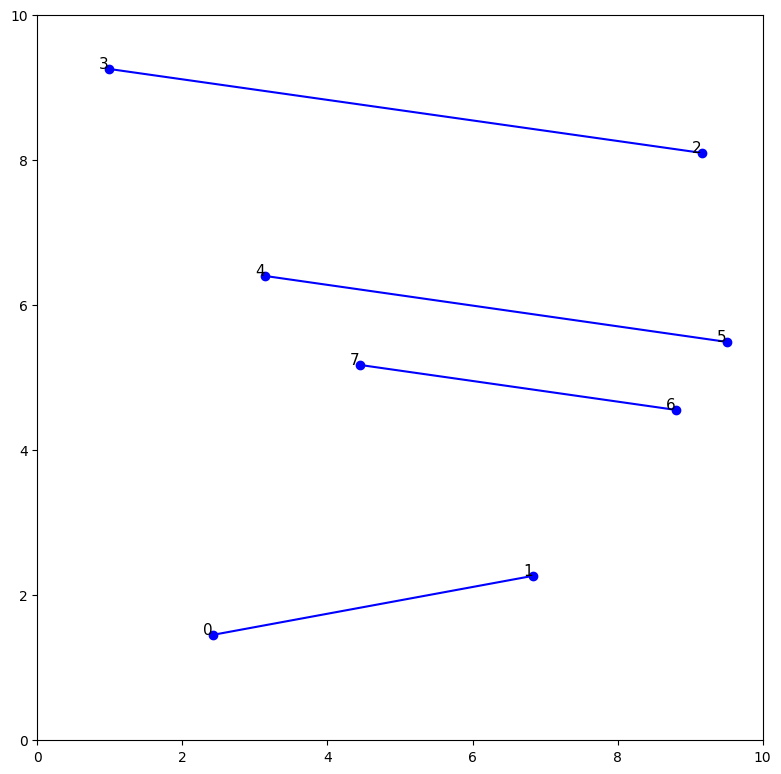

In [36]:
root = tk.Tk()
plotter = Plotter(root)
tk.mainloop()

In [37]:
def createMap(lines):

    lineSegments = []    
    for i in permute(lines):
        
        p1 = Point(i[0][0], i[0][1])
        p2 = Point(i[1][0], i[1][1])
        lineSegments.append(Segment(p1, p2))
    
    rootTrap = createOuter(lines)
    rootNode = Tnode(rootTrap)
    sg = TrapezoidMap(rootNode)
    
    for segment in lineSegments:
        
        intersections = []
        start = sg.query(segment.leftPoint)
        end = sg.query(segment.rightPoint)
        findIntersectTrapezoids(start, segment, intersections)
        
        if start == end:
            added = insertIntoOne(sg, intersections[0], segment)
        else:
            added = insertIntoMany(sg, intersections, segment)
              
    
    return sg
        

In [43]:
l1 = [
((1.3560192461466352, 1.232249703587283), (6.939607632282793, 2.1283811729671602)),
((1.3560192461466352, 7.119144125513552), (5.5057972812749885, 7.298370419389528))
]

sg = createMap(l1)

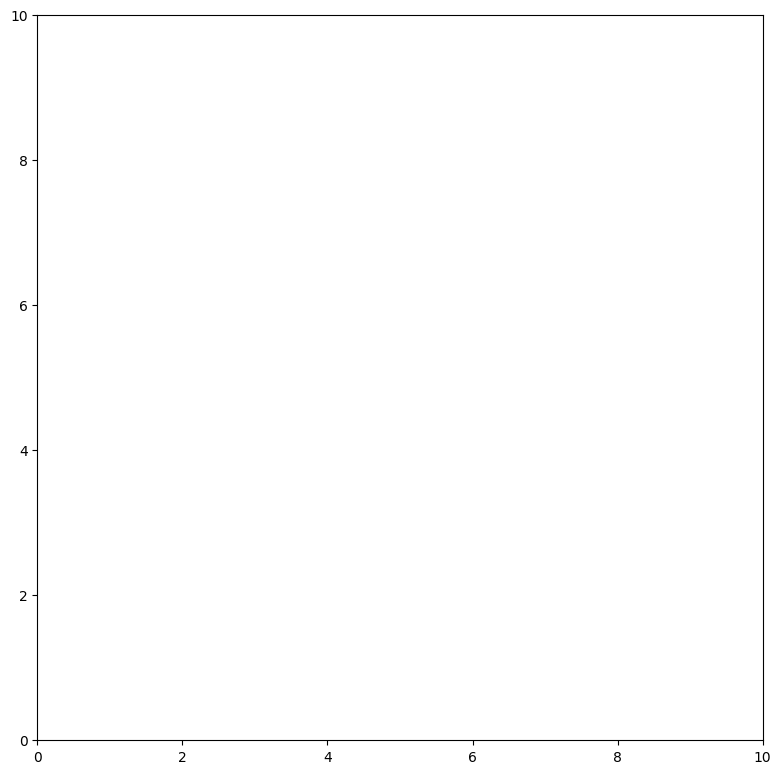

In [42]:
r1 = tk.Tk()
p1 = Plotter(r1)
tk.mainloop()